# Linear Regression Bike Sharing Problem

## Introduction

A bike-sharing system allows people to rent bicycles for a short time, either for free or for a fee. Users can pick up bikes from specific docking stations, which are usually controlled by computers. To unlock a bike, users enter their payment information, and they can return the bike to any dock in the same system.

Right now, BoomBikes, a bike-sharing company in the US, is facing big problems because their revenue has dropped significantly due to the COVID-19 pandemic. This health crisis has made it hard for the company to keep running and make a profit. To tackle this issue, BoomBikes is creating a new business plan to increase its revenue as the economy starts to recover and lockdowns are lifted.

BoomBikes wants to find answers to important questions like: What factors influence the demand for shared bikes? How well do these factors explain changes in bike usage? By figuring this out, BoomBikes hopes to gather useful information that will help them make better business decisions.

This effort will help BoomBikes deal with the challenges caused by the pandemic and prepare for future growth in the competitive bike-sharing market. By understanding what customers want and need, BoomBikes can improve its services and potentially attract more users as the demand for shared bikes increases.


## Problem Statement

BoomBikes is a bike-sharing company in the US that provides short-term bike rentals through automated docking stations. Users can rent bikes from one location and return them to any other dock within the same system. This assignment focuses on building a multiple linear regression model to predict bike demand for BoomBikes, a bike-sharing provider impacted by COVID-19. The pandemic has severely affected their revenue, so as the economy begins to reopen, understanding the factors influencing bike usage is crucial for their recovery strategy. BoomBikes has collected extensive data on daily bike demands, including variables like weather conditions and user behaviors etc. 
The company aims to identify which factors significantly affect bike demand and how well these factors explain variations in usage. By developing this predictive model, BoomBikes will be better equipped to respond to customer needs and improve its service offerings. This analysis will not only help BoomBikes enhance revenue but also position the company favorably against competitors in the bike-sharing market, 
ensuring they can meet the increased demand as restrictions are lifted.

**Current Challenge:**
- The company is facing significant revenue losses due to the COVID-19 pandemic
- They need to develop a strategic business plan for post-pandemic recovery
- Their goal is to maximize revenue once lockdowns end and economic conditions improve

**Business Objective:**

The company wants to:
1. Understand post-pandemic bike-sharing demand patterns
2. Identify key factors that influence bike rental demand
3. Position themselves ahead of competitors when market conditions improve
4. Optimize their services based on predicted demand

**Study Purpose:**
BoomBikes has hired consultants to:
- Analyze factors affecting bike-sharing demand in the American market
- Identify significant variables that predict demand
- Determine how well these variables explain demand fluctuations
- Use meteorological data and consumer behavior patterns to create accurate predictions

**Data Collection:**
The company has gathered comprehensive data that includes:
- Daily bike demand figures across the American market
- Weather-related factors
- Consumer behavior patterns
- Other relevant variables that might impact demand

**Expected Outcome:**
The analysis should help BoomBikes:
- Make data-driven decisions for post-pandemic operations
- Better understand customer needs and preferences
- Optimize bike availability based on predicted demand
- Develop effective business strategies
- Increase market share and profitability

This analysis is crucial for BoomBikes' recovery and growth strategy, as it will help them understand and prepare for post-pandemic market conditions while gaining a competitive advantage in the bike-sharing industry. 

## Dataset Characteristics

The dataset contains daily bike rental information from a bike-sharing program. The data includes daily records with details like date, weather, temperature, and the number of bike rentals. Key variables are:

* **`instant`:** A unique ID for each day's record.

* **`dteday`:** The date of the rental.

* **`season`:**  Categorical variable (1=spring, 2=summer, 3=fall, 4=winter).

* **`yr`:** Year (0=2018, 1=2019).  This is important because bike-sharing usage likely grew over this period.

* **`mnth`:** Month (1-12).

* **`holiday`:** Indicates whether the day was a holiday.

* **`weekday`:** Day of the week.

* **`workingday`:**  A binary variable (1 if not a weekend or holiday, 0 otherwise).

* **`weathersit`:** Categorical variable describing weather conditions (1=clear, 2=misty/cloudy, 3=light rain/snow, 4=heavy rain/snow).

* **`temp`, `atemp`, `hum`, `windspeed`:** Temperature (Celsius), feeling temperature, humidity, and windspeed.

* **`casual`:** Number of casual (non-registered) users.

* **`registered`:** Number of registered users.

* **`cnt`:** Total number of bike rentals (`casual` + `registered`). This is our target variable.

 

## Bike Demand Prediction: Data Prep, Modeling, and Evaluation 

**1. Data Preparation:**

* **Handling Categorical Variables:** Columns like 'weathersit' and 'season' contain numerical codes representing categories (e.g., 1=Clear, 2=Cloudy, 3=Light Rain for 'weathersit'). We must convert them into a format suitable for machine learning models (e.g., using one-hot encoding).

* **The 'yr' Variable:**  While 'yr' only has two values (0 and 1), it represents a significant time trend.  Do *not* drop this column.  The increasing popularity of bike-sharing suggests that the demand likely increased from 2018 to 2019.  Including 'yr' allows the model to capture this trend.


**2. Model Building:**

* **Target Variable:** The target variable ('cnt') represents the total number of bike rentals (casual + registered).The model will learn the relationships between the features (weather, time of year, etc.) and the total rentals.

* **Model Training:** Split the data into training and testing sets. Train the chosen model on the training set, which will be used to make predictions using unseen data (the test set).


**3. Model Evaluation:**

* **Prediction on Test Set:** After training the model, use it to make predictions on the test set (`y_pred`).

* **R-squared Calculation:** Use the provided code to calculate the R-squared score:

```python
from sklearn.metrics import r2_score

    r2_score(y_test, y_pred) 
```

This score indicates the goodness of fit of the model. A higher R-squared (closer to 1) indicates a better fit.

* **Residual Analysis:** Examine the residuals (the differences between actual and predicted values).  Look for patterns or trends in the residuals. Randomly scattered residuals suggest a good model fit, while patterns indicate potential issues with model assumptions or missing variables.


## Multiple Linear Regression

### Step - 1: Reading and Understanding the Data

Understanding data involves identifying its types, sources, and quality. This foundational step enhances insight extraction and decision-making, ensuring effective analysis and interpretation.

##### Import Libraries

In [2]:
# Import the warnings module to manage warning messages  
import warnings  

# Suppress all warnings from being displayed in the console  
# This can help keep output clean during development or testing  
warnings.filterwarnings('ignore') 


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing machine learning and statistical libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score


#### Initial exploration of data

In [4]:
# Load the dataset
bike_sharing_data = pd.read_csv("day.csv")


In [5]:

# Check the shape of the dataset (rows, columns)
print(bike_sharing_data.shape)


(730, 16)


In [6]:
# Display the first few rows of the dataset
bike_sharing_data.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
# Get a summary of dataset information (column types, non-null values, etc.)
bike_sharing_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# Generate descriptive statistics for numerical columns
bike_sharing_data.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
# Display column names
bike_sharing_data.columns


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [10]:
# Check the total number of elements in the dataset

bike_sharing_data.size


11680

**Reason**

I loaded the CSV file and checked the number of rows and columns which is `(730, 16)`. I reviewed the dataset's information, including column data types and file size, and 
examined the top five rows with `head()` to assess data quality and structure, identifying any issues for further analysis.

#### Data Cleaning

##### Handle Missing Data and Duplicates

In [11]:
# Check for missing values in each column
bike_sharing_data.isnull().sum()


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
# Remove duplicate rows (if any) and store in a new DataFrame
duplicate_value = bike_sharing_data.copy()


In [13]:
duplicate_value.drop_duplicates(inplace=True)

# Compare shapes before and after removing duplicates
print("Shape after removing duplicates:", duplicate_value.shape)
print("Original shape:", bike_sharing_data.shape)


Shape after removing duplicates: (730, 16)
Original shape: (730, 16)


In [14]:

# Check the frequency of different seasons in the dataset
bike_sharing_data.season.value_counts()


season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [15]:
# Check the distribution of humidity values
bike_sharing_data.hum.value_counts()


hum
61.3333    4
53.8333    3
55.2083    3
57.0000    3
56.8333    3
          ..
86.1667    1
48.5000    1
76.4167    1
74.1667    1
66.2917    1
Name: count, Length: 594, dtype: int64

**Reason**

I checked for null values using the `isna()` and `sum()` methods. The results showed that no columns contained null values. To check for duplicate rows, I created a copy of 
the DataFrame. Then, I used the `drop_duplicates()` method with `inplace=True` on the copy. By comparing the shapes (number of rows and columns) of the original DataFrame
and the deduplicated copy, I confirmed that no duplicate rows were present in the dataset. There seems to be no Junk/Unknown values in the entire dataset.

##### Remove Unnecessary and Redundant Columns

In [16]:
# Drop unnecessary columns
# 'instant': Index column
# 'dteday': Date column (not needed for numerical analysis)
# 'casual' and 'registered': We only need total counts ('cnt')
bike_sharing_data.drop(['instant','dteday','casual','registered'], axis=1, inplace=True)


In [17]:
# Check dataset information after dropping columns
bike_sharing_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [18]:
# Verify the new shape of the dataset
bike_sharing_data.shape


(730, 12)

In [19]:
# Display the first few rows again to confirm changes
bike_sharing_data.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [20]:
# Check frequency of seasons after modifications
bike_sharing_data.season.value_counts()


season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [21]:
# Check the distribution of humidity values again
bike_sharing_data.hum.value_counts()


hum
61.3333    4
53.8333    3
55.2083    3
57.0000    3
56.8333    3
          ..
86.1667    1
48.5000    1
76.4167    1
74.1667    1
66.2917    1
Name: count, Length: 594, dtype: int64

In [22]:
print("\n  Checking for Redundant Columns  :  ")  

# Check for columns with zero variance, Removing columns where there is not even 2 unique values, only one value is present
# Checking columns and storing it in zero_variance_cols, then printing the list of the columnns and droping them and updating our data set

zero_variance_cols = bike_sharing_data.columns[bike_sharing_data.nunique() == 1]  
if len(zero_variance_cols) > 0:  
    print("\n Columns with zero variance (will be removed) : ")  
    print(zero_variance_cols.tolist())  
    bike_sharing_data = bike_sharing_data.drop(columns=zero_variance_cols)



  Checking for Redundant Columns  :  


In [23]:
# Confirm final dataset shape
bike_sharing_data.shape


(730, 12)

**Reason**

The columns **'instant'**, **'dteday'**, **'casual'**, and **'registered'** were dropped because they are not necessary for our analysis:  

- **'instant'**: Just an index column, not needed for modeling.  
- **'dteday'**: A date column, but time-based patterns can be captured using 'season', 'year', and 'month'.  
- **'casual'** and **'registered'**: The total count of bike rentals ('cnt') already includes these, so keeping them would introduce redundancy.  

After dropping these columns, we verified the dataset structure using `.info()`, checked its shape, and confirmed that the first few rows reflect the expected changes. We also reviewed the frequency distributions of **'season'** and **'hum'** to understand their impact after modification. This step ensures we remove irrelevant data, reduce complexity, and improve model performance. 🚴‍♂️

##### Standardizing Column Names and Removing Unnecessary Rows

In [24]:
# Rename columns for better readability

bike_sharing_data.rename(columns={'mnth':'month','yr':'year','hum':'humidity'}, inplace=True)


In [25]:
# Verify if the column names have been updated correctly

bike_sharing_data.head()


,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [26]:
# Check for duplicate rows to avoid redundant data

duplicate_rows = bike_sharing_data.duplicated().sum()  
print(f"\nNumber of duplicate rows: {duplicate_rows}")  



Number of duplicate rows: 0


In [27]:
# Check the initial shape of the dataset  
print("Original shape:", bike_sharing_data.shape)  

# Calculate the percentage of missing values for each row  
missing_percentage = bike_sharing_data.isnull().mean(axis=1) * 100  

# Identify rows that exceed the threshold  
rows_to_drop = bike_sharing_data[missing_percentage > 30]  

# Print the rows that exceed the missing value threshold
print("Rows with more than 30% missing values:\n", rows_to_drop)  

# this will print the rows which you have to drop, if any


Original shape: (730, 12)
Rows with more than 30% missing values:
 Empty DataFrame
Columns: [season, year, month, holiday, weekday, workingday, weathersit, temp, atemp, humidity, windspeed, cnt]
Index: []


In [28]:
# Verify if the shape of the dataset changes after handling duplicates and missing values
bike_sharing_data.shape


(730, 12)

**Reason**

1. **Renaming Columns**: Columns like `'mnth'`, `'yr'`, and `'hum'` were renamed to `'month'`, `'year'`, and `'humidity'` for better readability.

2. **Verifying Column Names**: Used `.head()` to ensure the renaming was successful.  

3. **Checking Duplicates**: Identified duplicate rows to prevent redundancy in analysis.  

4. **Checking Dataset Shape**: Stored initial shape to track changes after cleaning.  

5. **Handling Missing Values**: Calculated missing percentages and flagged rows exceeding 30%.  

6. **Verifying Changes**: Rechecked dataset shape to confirm no unnecessary removals.  

These steps improve data quality and ensure accurate modeling.

##### Mapping And Data Conversion

In [29]:
# Display basic information about the dataset, including column data types and missing values  
bike_sharing_data.info()  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   year        730 non-null    int64  
 2   month       730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [30]:
# Compute and display the correlation matrix to analyze relationships between numerical variables  
bike_sharing_data.corr()  


,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
year,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
month,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
humidity,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


**Consideration for Categorical Features**

We observe that features such as `season`, `mnth`, `weekday`, and `weathersit` are represented as integers in the dataset, even though they should be treated as categorical variables.   

**Reasons to Treat Them as Categorical:**

1. **`season`:** This feature indicates the different seasons (spring, summer, autumn, winter). Although numerically encoded (e.g., 1 for spring, 2 for summer), seasons are distinct categories without a mathematical relationship.  

2. **`mnth`:** This represents the months of the year (1 to 12). Each month impacts bike-sharing behavior differently, so it’s more appropriate to treat them as categories rather than numerical values.  

3. **`weekday`:** This indicates the day of the week (0 for Sunday through 6 for Saturday). Like months, weekdays have unique effects on user behavior that should be captured by treating them as categorical variables.  

4. **`weathersit`:** This feature denotes various weather conditions (e.g., clear, cloudy, rainy) and is inherently categorical. Treating it as such allows for a more accurate representation of its impact on bike usage.

In [31]:
# Encoding/mapping the season column from numerical values to meaningful category labels  

bike_sharing_data.season = bike_sharing_data.season.map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}) 


In [32]:
# Encoding/mapping the month column to abbreviated month names for better readability  
bike_sharing_data.month = bike_sharing_data.month.map({1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may',  
                                                        6: 'june', 7: 'july', 8: 'aug', 9: 'sep', 10: 'oct',  
                                                        11: 'nov', 12: 'dec'})  



In [33]:
# Encoding/mapping the weekday column to abbreviated weekday names for better understanding  
bike_sharing_data.weekday = bike_sharing_data.weekday.map({0: 'sun', 1: 'mon', 2: 'tue', 3: 'wed',  
                                                            4: 'thu', 5: 'fri', 6: 'sat'})  


In [34]:

# Encoding/mapping the weathersit column to descriptive weather conditions  
bike_sharing_data.weathersit = bike_sharing_data.weathersit.map({1: 'Clear', 2: 'Misty',  
                                                                  3: 'Light_snowrain', 4: 'Heavy_snowrain'})  


In [35]:
# Display the first few rows of the dataset to verify the changes  
bike_sharing_data.head()  


,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [36]:
# check the column info of the dataset

bike_sharing_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


**Reason**

Mapping numerical values to descriptive categories improves readability and interpretability of the dataset. It helps in analysis by making the data more intuitive for visualizations and model explanations. This transformation ensures that categorical variables are represented meaningfully, preventing confusion during exploratory data analysis (EDA) and feature engineering.

##### Handling Outliers

In [37]:
#Checking columns before handling outliers
bike_sharing_data.columns


Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'cnt'],
      dtype='object')

In [38]:
# Print the number of unique values in each column for overview  
unique_counts = bike_sharing_data.nunique()  
print("Unique values in each column:\n", unique_counts) 


Unique values in each column:
 season          4
year            2
month          12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
humidity      594
windspeed     649
cnt           695
dtype: int64


In [39]:
# Define a list of continuous columns to visualize  
continuous_cols = ['temp', 'atemp', 'humidity', 'windspeed']


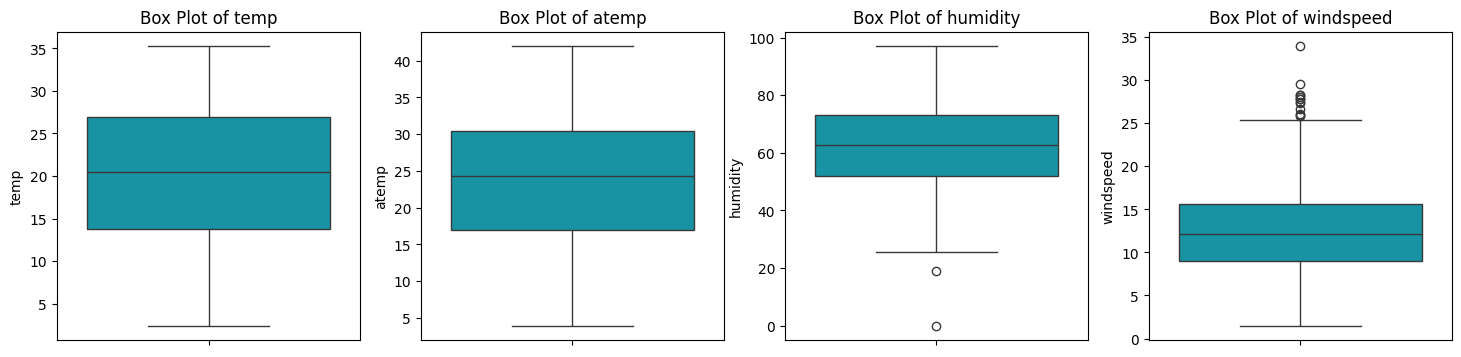

In [40]:
# Set up the figure size for box plots  
from seaborn import color_palette


plt.figure(figsize=(18, 4))  

# Loop through the continuous columns to create individual box plots  
for index, col in enumerate(continuous_cols, start=1):  
    plt.subplot(1, 4, index)  # Create a subplot for each continuous variable  
    sns.boxplot(y=bike_sharing_data[col], palette = sns.color_palette('nipy_spectral',2))  # Draw a box plot for the column  
    plt.title(f'Box Plot of {col}')  # Title for each subplot


**Reason**

Upon review of the outliers in the **humidity** and **windspeed** features, we have determined that their values are not excessively high or low. Therefore, we will proceed
with our analysis without making significant adjustments for these outliers, as they do not appear to have a substantial impact on our results.

##### Imputing Values

In my dataset, there are no missing values, outliers, or junk values that could affect the analysis. This cleanliness ensures that our data is reliable and ready for modeling. Since no imputation is necessary, we can confidently skip this step and move forward with exploratory data analysis. 


### Step - 2: EDA Analysis

This analysis will help us understand the dataset better, identify trends, and uncover insights related to bike rental demand, ultimately guiding us in building a more accurate predictive model. If there is some obvious multicollinearity going on, this is the first place to catch it, Here's where you'll also identify if some predictors directly have a strong association with the outcome variable
We'll visualise our data using matplotlib and seaborn.

##### Visualize the numerical columns

<Figure size 1500x2000 with 0 Axes>

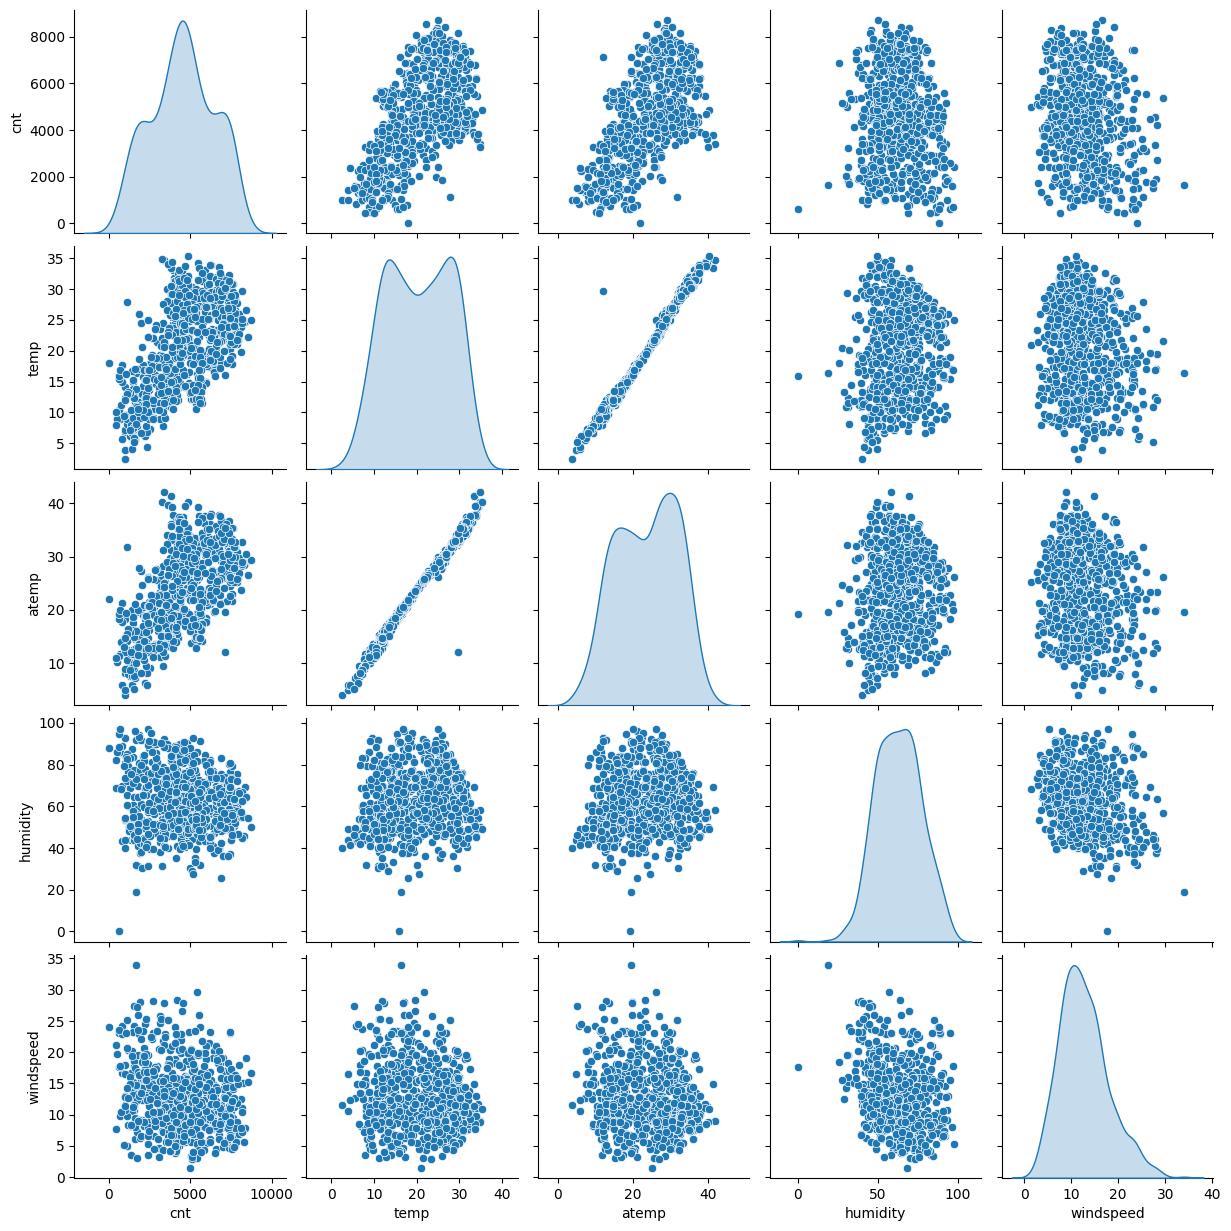

In [41]:
# Set the figure size to ensure better visibility of the plots  
plt.figure(figsize=(15, 20))  

# Create pair plots to visualize relationships between numerical variables  
# 'cnt' (total bike rentals) is analyzed against key numerical features  
sns.pairplot(data=bike_sharing_data, vars=['cnt', 'temp', 'atemp', 'humidity', 'windspeed'], diag_kind='kde')  

# Show the pair plots  
plt.show() 


**Observations**

It appears that both `temp` and `atemp` show the highest correlation with the target variable `cnt`. Additionally, `temp` and `atemp` are highly correlated with each other, indicating that they provide similar information regarding temperature in relation to bike rental demand.


##### Visualize the categorical columns

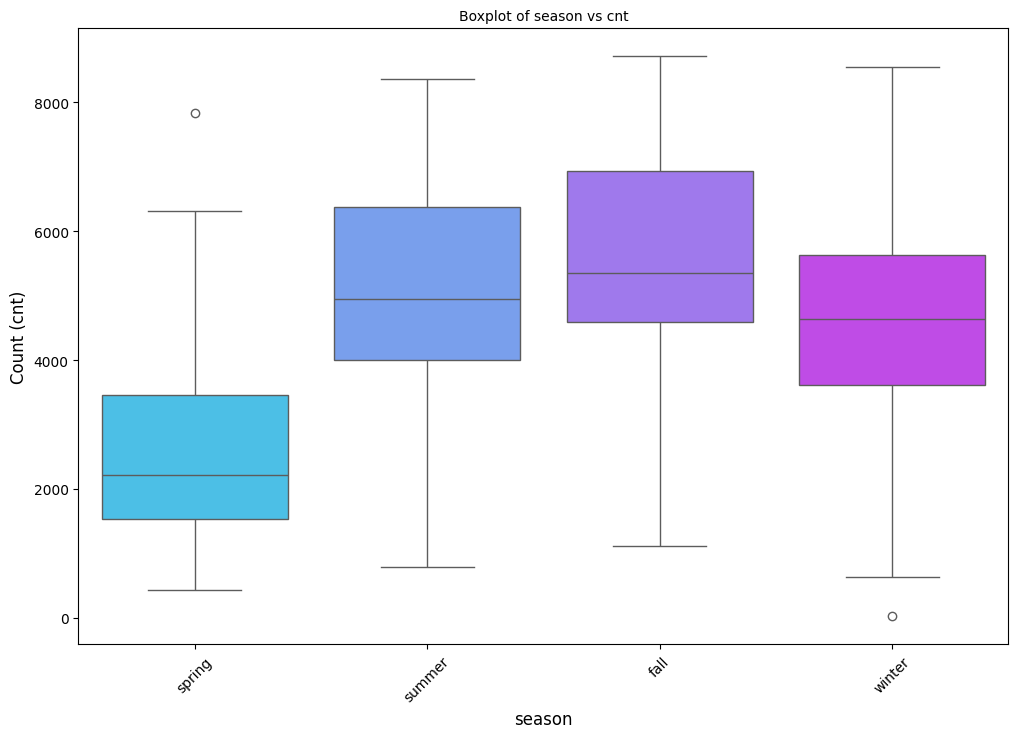

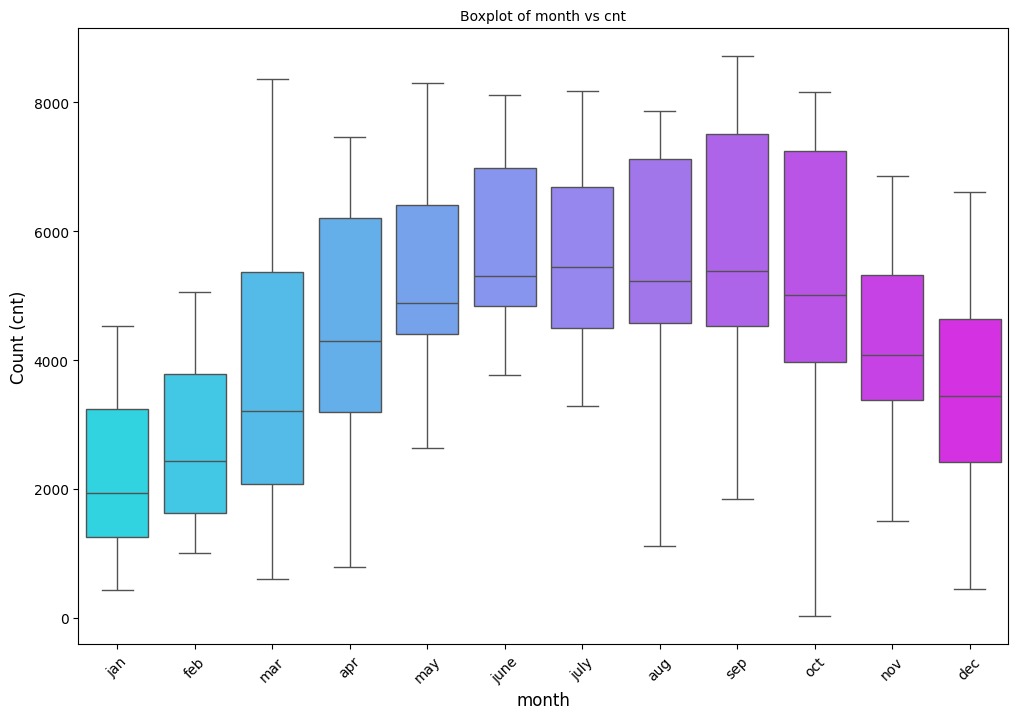

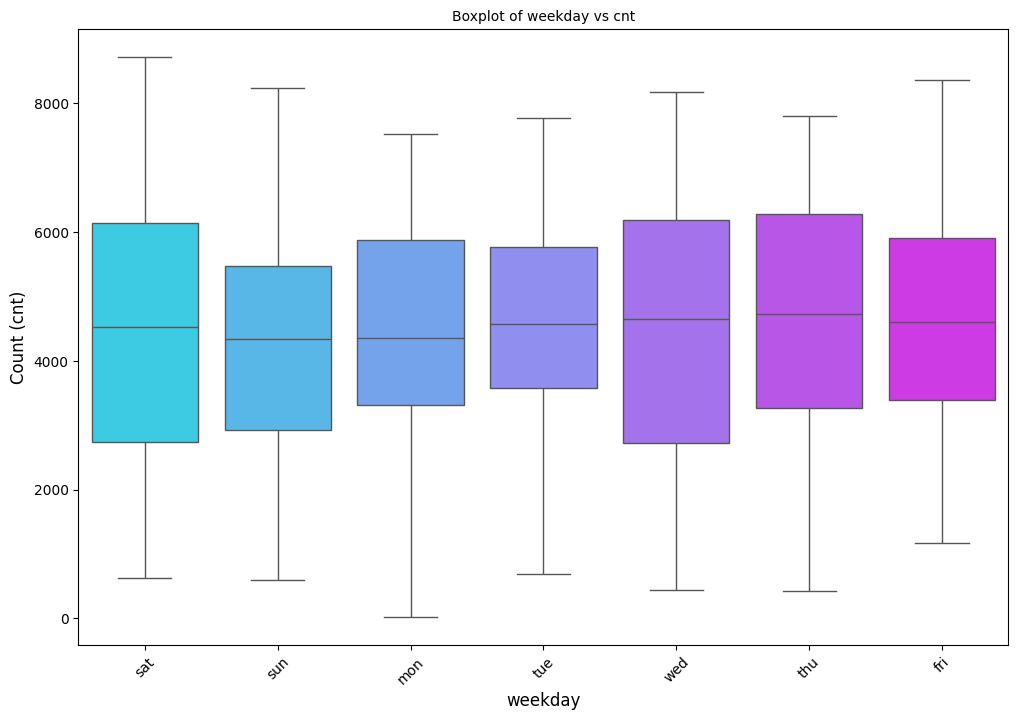

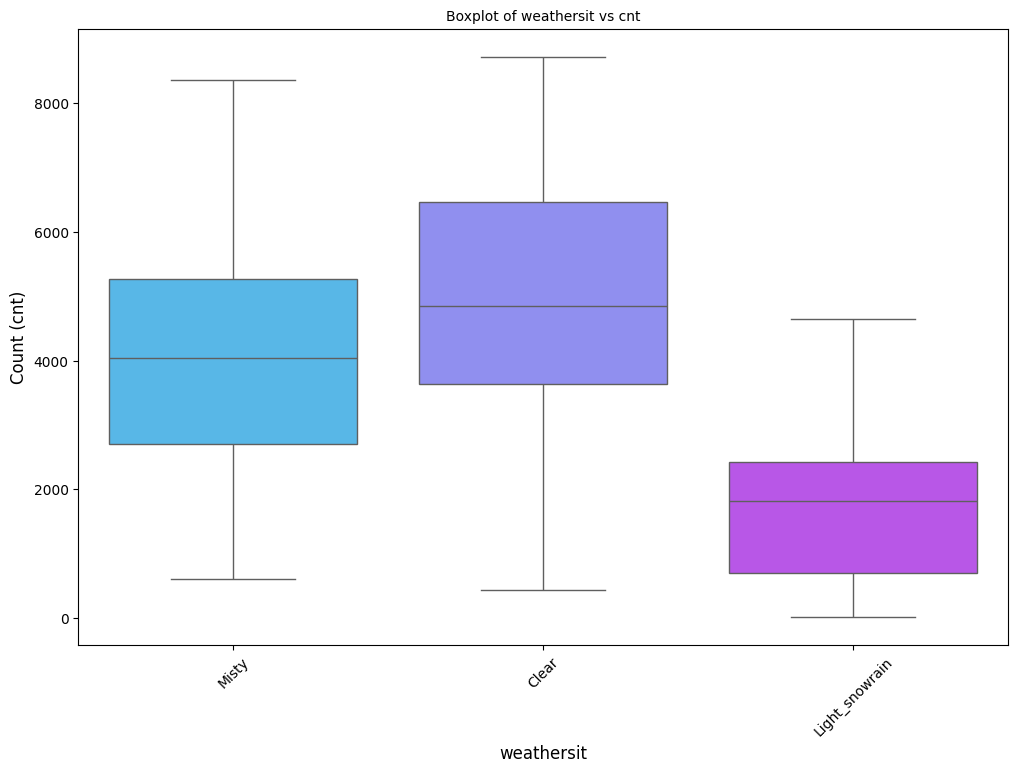

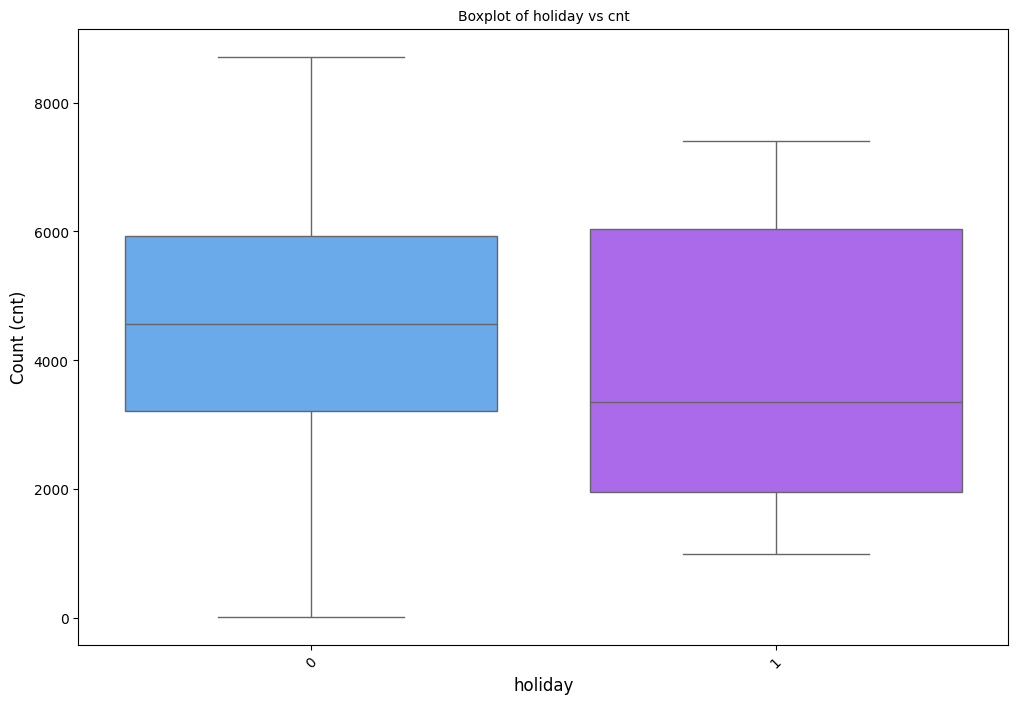

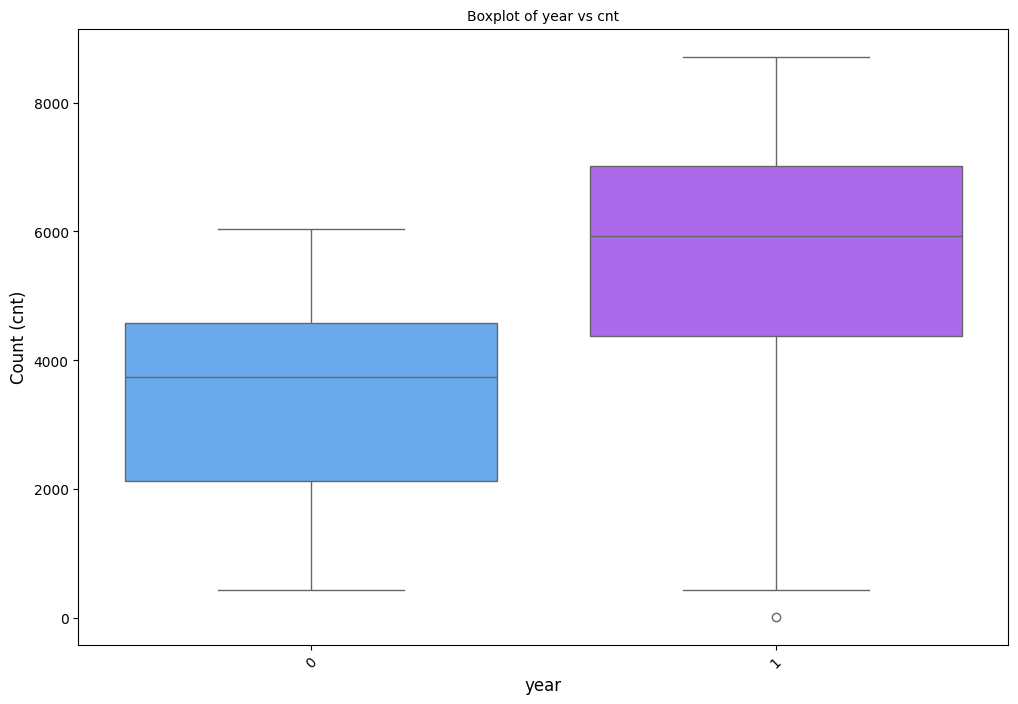

In [42]:
# Notes on categorical variable encoding:  
# Holiday: 1 (Holiday), 0 (Not-Holiday)  
# Year: 2018 (0), 2019 (1) 
#Univariate analysis

categorical_var = ['season','month','weekday','weathersit','holiday','year']
# Loop over each categorical variable you want to visualize  

for cat_var in categorical_var:   
    plt.figure(figsize=(12, 8))  # Set the figure size for the plot  
    # Create a box plot for the current categorical variable (cat_var) against 'cnt'  
    sns.boxplot(x=cat_var, y='cnt', data=bike_sharing_data, palette='cool') 
    plt.title(f'Boxplot of {cat_var} vs cnt', fontsize=10)  # Set the title of the plot  
    plt.xlabel(cat_var, fontsize=12)  # Label for the x-axis  
    plt.ylabel('Count (cnt)', fontsize=12)  # Label for the y-axis  
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed  
    plt.show()  # Display the plot  


**Insights**

The boxplots presented reveal patterns in counts based on various categorical factors: holidays, weather conditions, weekdays, and seasons.

1. **Holiday Impact**: Boxplots indicate that counts are higher (around 6,000) on holidays (1) compared to non-holidays (0), suggesting increased activity on holidays.

2. **Weather Influence**: The weather conditions show significant variability. "Clear" days lead to the highest counts (6,000-8,000), while "Light Snow/Rain" experiences the lowest counts (around 2,000). This indicates that weather significantly impacts activity levels.

3. **Weekday Variations**: Activity tends to peak during weekends (Saturday and Sunday), aligning with leisure activities. Mid-week days like Tuesday and Wednesday show lower counts, suggesting work-related patterns might suppress participation.

4. **Seasonal Effects**: Spring and summer appear to attract more activity (around 5,000-6,000), while winter experiences the least (approximately 2,000-3,000). This aligns with expectations as warmer weather typically encourages outdoor activities.

5. **Year**: Year "1" shows a significantly higher median participation count (around 6,000) compared to year "0," which hovers around 4,000. The interquartile range is also larger for year "1," suggesting greater variability in participation. Overall, this indicates a positive trend in activity levels over the years, with year "1" exhibiting more robust engagement compared to year "0."
- Year: 2018 (0), 2019 (1) 

6. **Monthly Trends**: The second boxplot illustrates monthly participation trends. Counts increase steadily from January (around 2,000) to peak in July and August, surpassing 6,000. Participation generally remains high until October and starts to decline in November and December. This seasonal variation illustrates that warmer months attract more engagement, likely due to outdoor activities and favorable weather.



Overall, these insights highlight the importance of holidays, favorable weather, weekends, and seasonal considerations in affecting participation or counts in activities. Adjustments in planning can be made based on these factors to optimize engagement.


#### Analysis of Bike Rentals by Temperature and Weather Conditions Across Seasons

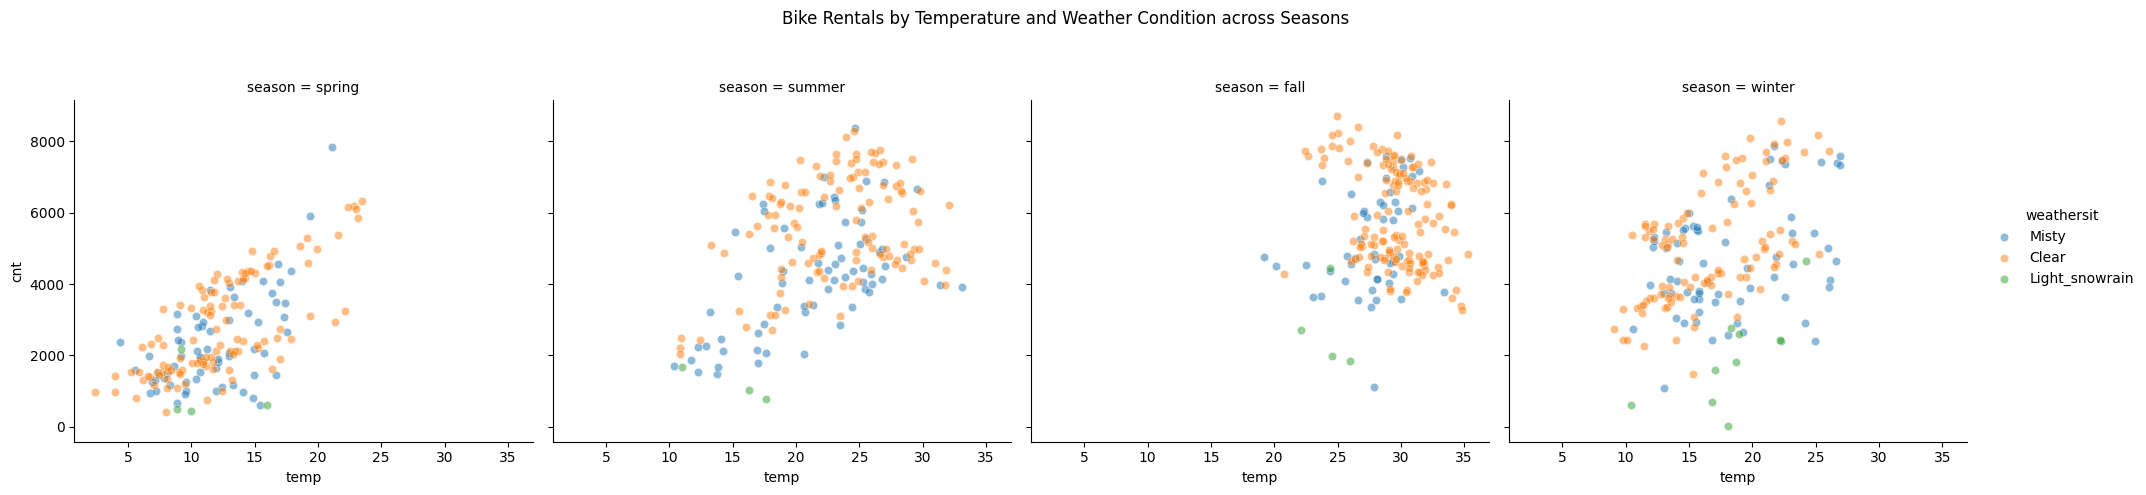

In [43]:
# Create a FacetGrid to visualize bike rentals based on temperature, weather condition, and season
# 'col' parameter splits data into separate plots for each season
# 'hue' parameter colors points based on different weather conditions
g = sns.FacetGrid(bike_sharing_data, col='season', hue='weathersit', height=5, aspect=1)  

# Plot a scatterplot on each seasonal facet
# 'temp' on the x-axis and 'cnt' (number of rentals) on the y-axis
# 'alpha=0.5' makes the points slightly transparent to reduce overplotting
g.map(sns.scatterplot, 'temp', 'cnt', alpha=0.5)  

# Add a legend to indicate weather conditions for better interpretability
g.add_legend()  

# Adjust subplot layout to ensure the title does not overlap with the plots
plt.subplots_adjust(top=0.8)  

# Set a common title for all facets to provide context
g.fig.suptitle('Bike Rentals by Temperature and Weather Condition across Seasons')  

# Display the plots
plt.show()  


**Observation**

1. **Temperature and Rentals Correlation**:
   - **Observation**: There is a strong positive correlation between temperature and bike rentals across all seasons.
   - **Explanation**: Higher temperatures tend to encourage outdoor activities, resulting in increased bike rentals.

2. **Peak Rentals in Summer**:
   - **Observation**: Summer experiences the highest number of rentals, especially when temperatures range from 20-30°C.
   - **Explanation**: Warm, sunny weather is optimal for biking, leading to consistent rental spikes.

3. **Lowest Rentals in Winter**:
   - **Observation**: Winter months show the lowest rental counts.
   - **Explanation**: Cold and harsh weather conditions, such as snow, deter biking enthusiasts.

4. **Weather Conditions Impact**:
   - **Observation**: Clear weather significantly boosts rentals compared to misty or snowy conditions.
   - **Explanation**: Favorable weather makes biking more appealing, while poor conditions discourage participation.

5. **Misty Fall Conditions**:
   - **Observation**: Misty weather is common in fall and correlates with lower rental numbers.
   - **Explanation**: Variability in weather impacts bike usage negatively.

6. **Outlier Rentals with Favorable Conditions**:
   - **Observation**: Some rentals occur at cooler temperatures under clear conditions.
   - **Explanation**: Enthusiasts are likely to rent bikes despite lower temperatures if weather conditions are favorable.

**Summary:**
Strategies for promoting bike rentals should focus on warmer months and clear weather, while addressing the deterrent effects of cold and inclement conditions.


#### Exploring Relationships Among Variables Through Visualization

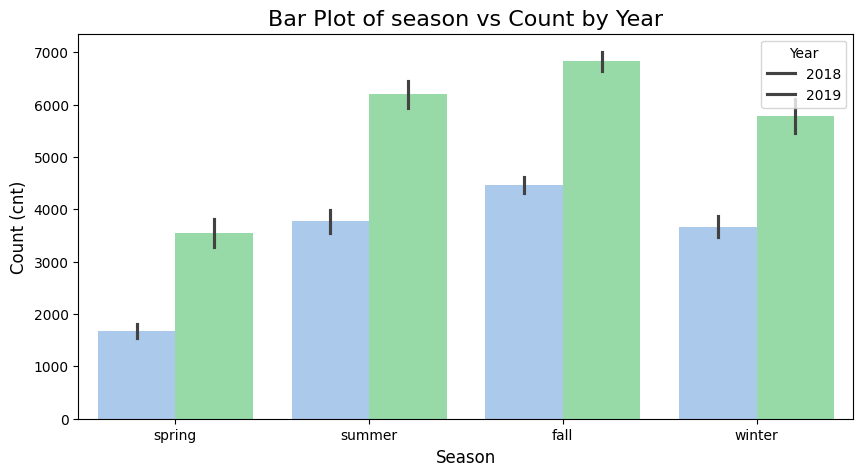

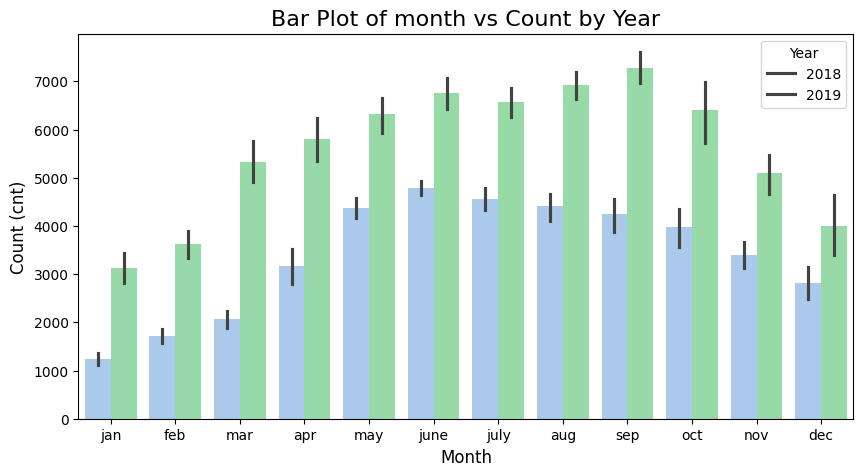

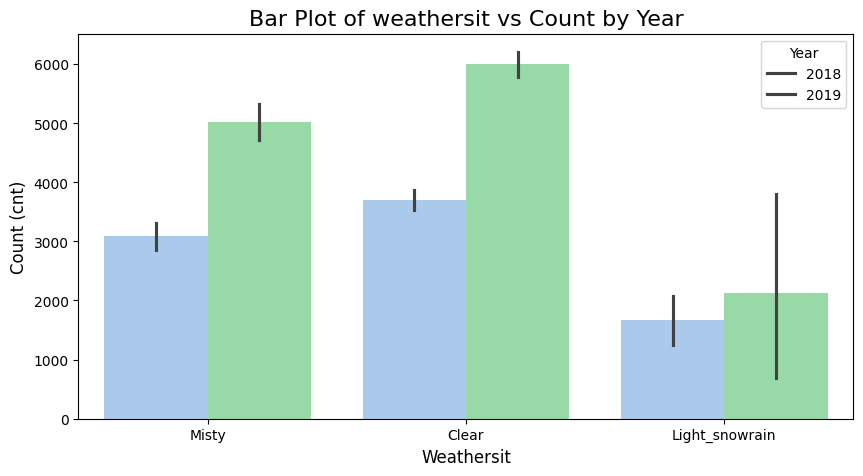

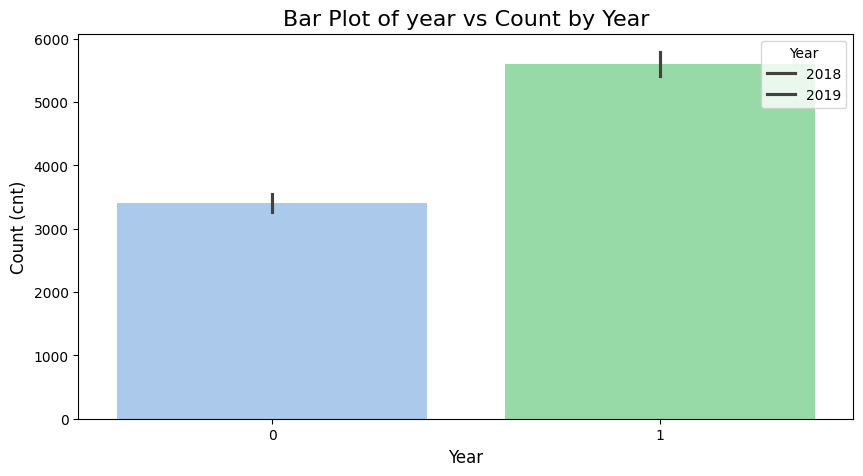

In [44]:
# Define the categorical variables to visualize  
categorical_var = ['season', 'month', 'weathersit', 'year']  

# Loop through the categorical variables to create bar plots  
for cat_var in categorical_var:  
    plt.figure(figsize=(10, 5))  # Set figure size  
    
    # Create a bar plot with 'cnt' as the y-axis and current categorical variable as x-axis  
    sns.barplot(x=cat_var, y='cnt', hue='year', data=bike_sharing_data, palette=sns.color_palette("pastel6").as_hex())
    
    # Set the title with the current categorical variable  
    plt.title(f'Bar Plot of {cat_var} vs Count by Year', fontsize=16)  
    
    # Set x and y axis labels  
    plt.xlabel(cat_var.capitalize(), fontsize=12)  
    plt.ylabel('Count (cnt)', fontsize=12)  
    
    # Adjust legend labels for better clarity  
    plt.legend(title='Year', labels=['2018', '2019'], loc='upper right')  
    
    plt.show()  # Show the plot 

# Year-2018: 0(Blue), Year-2019: 1(Green)



##### Observations and Insights

1. **Yearly Rentals**
- Looking at the data, it's clear that bike rentals surged in 2019 compared to 2018. In 2019, there were about 5,600 rentals, while 2018 only had around 3,400.
- This growth suggests that more people are hopping on bikes, which could be due to various factors like better marketing, improved services, or simply a rising trend in bike-sharing. It’s great to see that people are embracing this option!

2. **Weather’s Effect on Rentals**
- The numbers show that clear days see the most bike rentals, followed by misty ones. On the other hand, rentals drop significantly during rainy or snowy weather.
- It’s clear that weather plays a huge role in whether people choose to bike. Good weather is a big invitation to ride, while rain and snow tend to keep folks indoors. This insight could help in planning promotions for those sunny days!

3. **Monthly Trends**
- Summer months really take the lead in bike rentals, especially in June, July, and August. Rentals dip in winter, particularly in December and January.
- It seems that warmer weather is definitely a big draw for bikers. Understanding this can help the program plan better, ensuring they have more bikes available when the demand is high.

4. **Seasons and Their Impact**
- The rental numbers show that summer is the star of the show, followed by fall. Spring has decent usage, while winter sees the least activity.
- This trend highlights how less appealing biking can be in winter compared to the warmer seasons. It might be a good idea to think about seasonal promotions to encourage more people to bike, even when it’s chilly.

**Overall Takeaways**
- **Positive Growth**: The jump in bike rentals from one year to the next is a fantastic sign! It suggests that the bike-sharing program is gaining traction, which is exciting for the community.
- **Weather Matters**: Since weather significantly affects biking habits, the program could benefit from keeping an eye on forecasts to better meet demand.
- **Seasonal Opportunities**: The clear seasonal trends present a golden opportunity for targeted marketing. By focusing on promotional efforts during peak biking seasons, the program can maximize its reach and impact.

**Recommendations**
- The program could ramp up marketing efforts during spring and summer when biking is most popular.
- Collaborating with local businesses to create special offers on nice days could also be effective.
- Finally, being flexible and responsive to weather changes could help optimize bike availability, making sure riders have what they need, when they need it!


#### Correlation Matrix Analysis

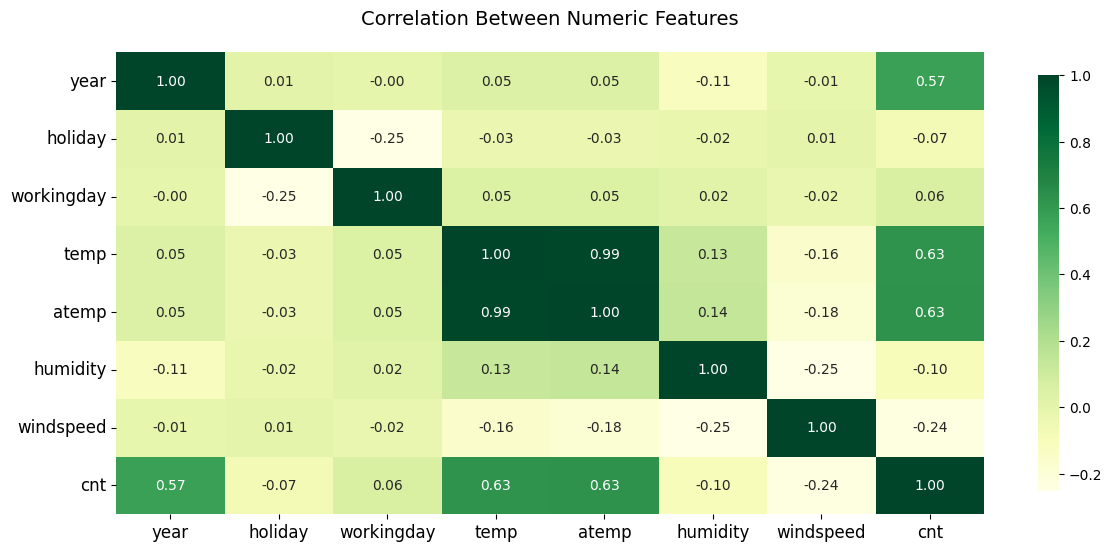

In [45]:
num_col = bike_sharing_data.select_dtypes(include = 'number')
plt.figure(figsize=(14, 6)) # Set figure size
plt.title("Correlation Between Numeric Features", fontsize=14, pad=20)
sns.heatmap(num_col.corr(),
            annot=True,
            fmt=".2f",  # Display correlations with 2 decimal places
            cmap="YlGn",  # Adjusted colormap for better readability
            annot_kws={"size": 10},  # Increase font size of annotations
            cbar_kws={"shrink": 0.9}  # Adjust color bar size)
)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


**Observation**

From the heatmap, `cnt` (the target variable) shows a **moderate positive correlation** with `temp` (0.63), `atemp` (0.63), and `year` (0.57), making them strong predictors for a linear regression model. However, `temp` and `atemp` are nearly perfectly correlated (0.99), indicating **multicollinearity**, which should be addressed by dropping one of them to avoid redundancy.

Features like `humidity` (-0.10), `windspeed` (-0.24), `holiday`, and `workingday` have weak or negligible correlations with `cnt`, suggesting limited predictive power. These can be considered for removal during feature selection.

**Key Takeaways**:
1. Include `temp`, `atemp` (choose one), and `year` as they are most relevant to predicting `cnt`.
2. Address multicollinearity between `temp` and `atemp` by either removing one or using regularization techniques like Ridge/Lasso regression.
3. Weakly correlated features, such as `humidity`, `windspeed`, `holiday`, and `workingday`, might not significantly contribute to the model's accuracy.

**Benefits for Linear Regression**:
- Selecting features based on correlation ensures relevance, improving model accuracy.
- Identifying multicollinearity avoids unstable coefficient estimates, enhancing model interpretability.
- Simplifying the feature set minimizes overfitting risks.

### Step - 3: Data Preperation For Linear Regression


In [46]:
# Display dataset information including column data types and missing values
bike_sharing_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


#### Creating dummy variables for categorical variables

In [47]:
# Create dummy variables for categorical columns to prepare data for modeling
# 'drop_first=True' avoids multicollinearity by dropping the first category for each variable
bike_sharing_data_new = pd.get_dummies(
    data=bike_sharing_data, 
    columns=['season', 'month', 'weekday', 'weathersit'], 
    drop_first=True
)

# Convert all dummy variable columns to integers for consistency
dummy_col = bike_sharing_data_new.filter(regex='season_|month_|weekday_|weathersit_').columns
bike_sharing_data_new[dummy_col] = bike_sharing_data_new[dummy_col].astype(int)



In [48]:
# Display first few rows of the transformed dataset
bike_sharing_data_new.head()


,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [49]:
# Display the shape (number of rows and columns) of the new dataset
bike_sharing_data_new.shape


(730, 30)

#### Splitting the Data into Training and Testing Sets
As you know, the first basic step for regression is performing a train-test split.

In [50]:
# Setting the random seed to ensure reproducibility
np.random.seed(42)

# Splitting the DataFrame into training and testing sets
# df_new is your original dataset, and we're using a 70/30 split
df_train, df_test = train_test_split(bike_sharing_data_new, train_size=0.7, random_state=42)


In [51]:
# check the shape of training datatse
df_train.shape


(510, 30)

In [52]:
# check the shape of testing datatse
df_test.shape


(220, 30)

#### Rescaling the Features
In regression models, it's important to rescale features to comparable scales, Without rescaling, coefficients from the model might vary widely, which can affect model evaluation.

Two common rescaling methods are:

1. **Min-Max Scaling (Normalization)**: Rescales values to a range of 0 to 1
2. **Standardization**: Rescales values to have a mean of 0 and a standard deviation of 1

For this case, we'll use **Min-Max scaling** to ensure the features are within a comparable range.

In [53]:
# List of continuous variables that we want to scale
num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']

# Initialize the MinMaxScaler to normalize the data (scales the data between 0 and 1)
scaler = MinMaxScaler()

# Fit the scaler to the training set and transform the training data
# This scales the selected numerical variables (columns in num_vars) of the training set
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


In [54]:
# Display the first few rows of the training dataset
df_train.head()


,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.609320,0,0,...,1,0,1,0,0,0,0,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.554026,0,1,...,0,0,1,0,0,0,0,0,0,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.088253,1,0,...,0,0,0,0,0,0,1,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0.862127,0,0,...,1,0,0,0,0,0,0,1,0,1
625,1,0,1,0.703024,0.637937,0.899098,0.839562,0.439696,0,0,...,0,1,0,0,0,0,1,0,0,1


In [55]:
# Display summary statistics of numerical columns in the training dataset
df_train.describe()


,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.519608,0.027451,0.668627,0.551313,0.526919,0.654203,0.415045,0.497429,0.231373,0.258824,...,0.090196,0.090196,0.149020,0.150980,0.152941,0.145098,0.131373,0.141176,0.029412,0.345098
std,0.500106,0.163554,0.471169,0.227237,0.212992,0.143788,0.185760,0.234207,0.422124,0.438419,...,0.286744,0.286744,0.356457,0.358381,0.360284,0.352545,0.338139,0.348545,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354526,0.354454,0.544033,0.281934,0.344772,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575824,0.564951,0.660798,0.384737,0.501871,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745338,0.698389,0.756977,0.526489,0.677080,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


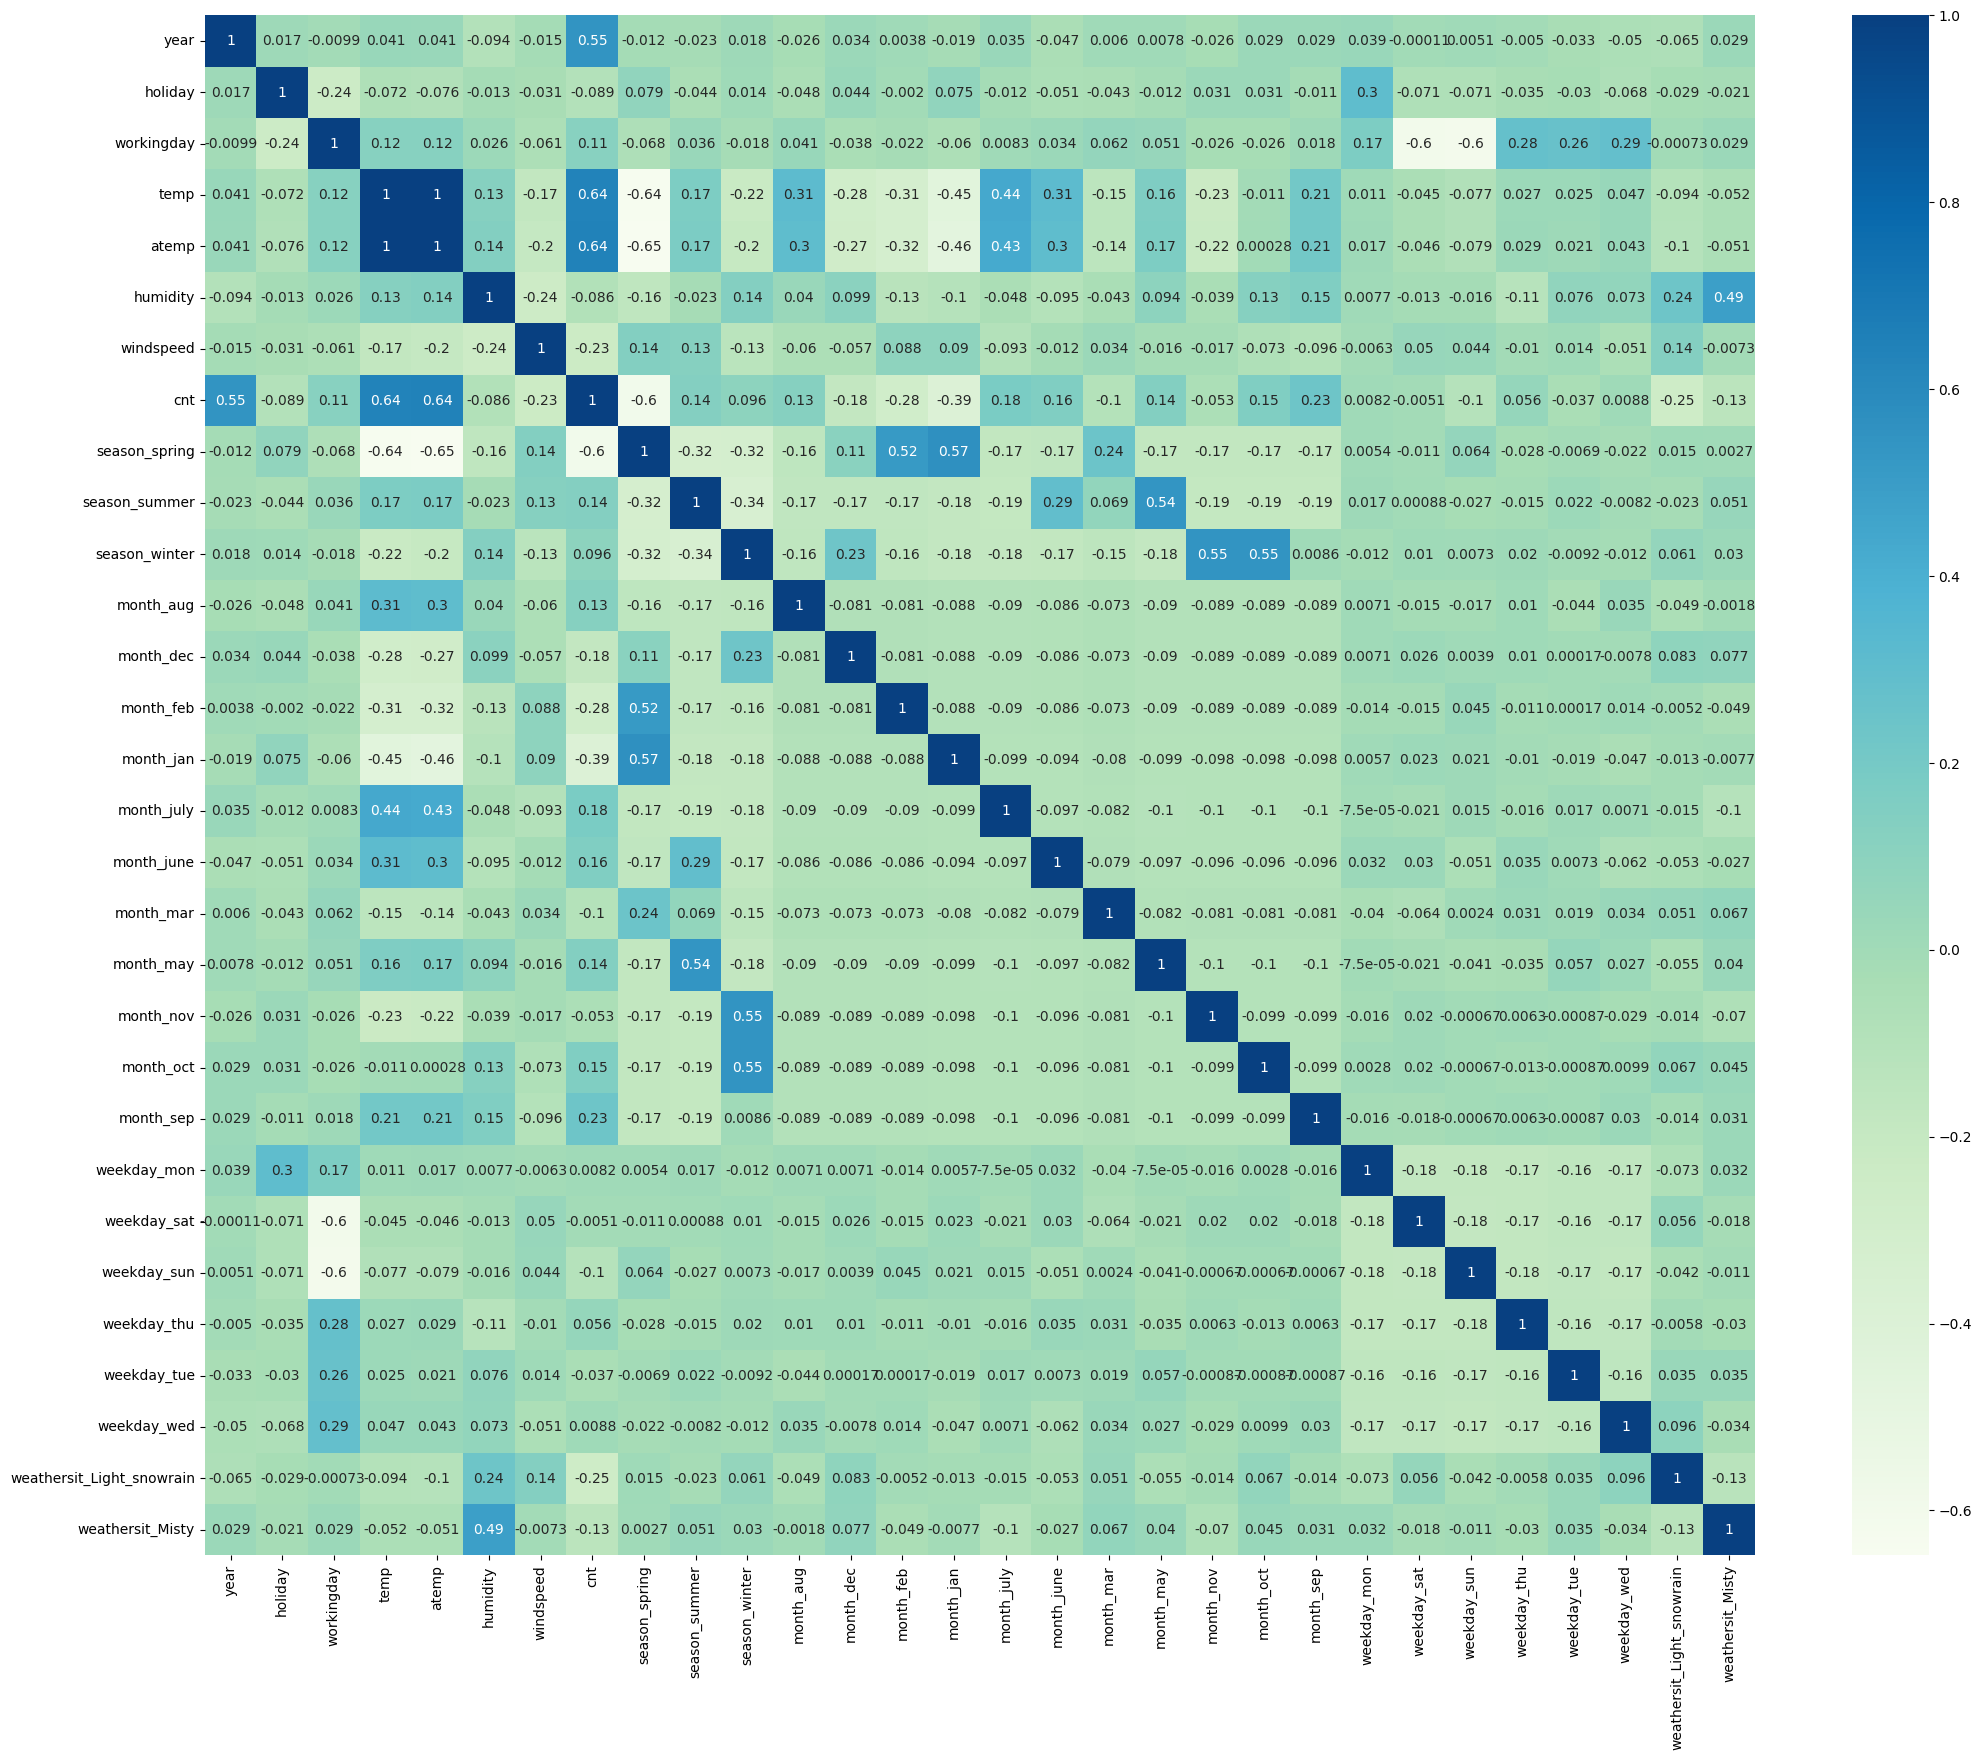

In [56]:
# Let's check the correlation coefficients to see which variables are highly correlated.

plt.figure(figsize = (25,20))
sns.heatmap(df_train.corr(), annot = True, cmap="GnBu")
plt.show()


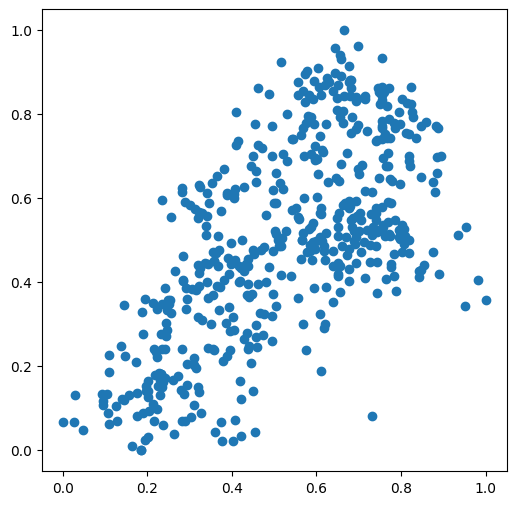

In [57]:
# Visualizing one of the correlation to see the trends via Scatter plot.
# The visualization confirms the positive correlation between "temp" and "cnt." As you noted, they are highly correlated with each other.

plt.figure(figsize=(6,6))
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()


### Step - 4: Building A Linear Model

#### Dividing into X and Y sets for the model building

In [58]:
# Separate target variable ('cnt') from training data
y_train = df_train.pop('cnt')  # Extract 'cnt' column as target variable
X_train = df_train            # Remaining columns become feature variables


#### Recursive feature elimination

In [59]:
# Initialize the Linear Regression model
lm = LinearRegression()

# Fit the model on the training data (X_train and y_train)
lm.fit(X_train, y_train)

# Initialize the RFE (Recursive Feature Elimination) with the linear regression model
# Set n_features_to_select to 15 (meaning we want to select 15 features)
rfe = RFE(lm, n_features_to_select=15)

# Run RFE to select the top 15 features based on feature importance
# The `fit()` method trains the model and ranks the features.
rfe = rfe.fit(X_train, y_train)


In [60]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('year', np.True_, np.int64(1)),
 ('holiday', np.False_, np.int64(3)),
 ('workingday', np.False_, np.int64(2)),
 ('temp', np.True_, np.int64(1)),
 ('atemp', np.True_, np.int64(1)),
 ('humidity', np.True_, np.int64(1)),
 ('windspeed', np.True_, np.int64(1)),
 ('season_spring', np.True_, np.int64(1)),
 ('season_summer', np.False_, np.int64(11)),
 ('season_winter', np.True_, np.int64(1)),
 ('month_aug', np.False_, np.int64(6)),
 ('month_dec', np.True_, np.int64(1)),
 ('month_feb', np.False_, np.int64(8)),
 ('month_jan', np.False_, np.int64(14)),
 ('month_july', np.True_, np.int64(1)),
 ('month_june', np.False_, np.int64(15)),
 ('month_mar', np.True_, np.int64(1)),
 ('month_may', np.False_, np.int64(4)),
 ('month_nov', np.True_, np.int64(1)),
 ('month_oct', np.False_, np.int64(5)),
 ('month_sep', np.True_, np.int64(1)),
 ('weekday_mon', np.False_, np.int64(10)),
 ('weekday_sat', np.True_, np.int64(1)),
 ('weekday_sun', np.False_, np.int64(9)),
 ('weekday_thu', np.False_, np.int64(13)),
 (

In [61]:
# Get the names of selected features from Recursive Feature Elimination (RFE)
col = X_train.columns[rfe.support_]
col


Index(['year', 'temp', 'atemp', 'humidity', 'windspeed', 'season_spring',
       'season_winter', 'month_dec', 'month_july', 'month_mar', 'month_nov',
       'month_sep', 'weekday_sat', 'weathersit_Light_snowrain',
       'weathersit_Misty'],
      dtype='object')

In [62]:
# Get the names of features that were not selected by RFE
X_train.columns[~rfe.support_]


Index(['holiday', 'workingday', 'season_summer', 'month_aug', 'month_feb',
       'month_jan', 'month_june', 'month_may', 'month_oct', 'weekday_mon',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [63]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]


#### Building model using statsmodel, for the detailed statistics

In this approach, we will create a linear regression model by checking the Variance Inflation Factor (VIF) and p-values to identify and remove variables with high VIF or high p-values manually. We’ll create a function for calculating VIF so that we can reuse it multiple times. Then, we will create a function for building the linear regression model, check the model summary, and store the models selected after applying the VIF-based feature selection in a column.

##### Model 1

**VIF Generic Function**

In [64]:
# Function to calculate and display VIF for each feature
def calculate_vif(X):
    """
    Calculate the Variance Inflation Factor (VIF) for each feature in the dataset.
    
    Arguments:
    X : pandas DataFrame : Features of the dataset
    
    Returns:
    pd.DataFrame : A DataFrame with features and their corresponding VIF values, sorted by VIF
    """
    # Create a DataFrame to store VIF values
    vif = pd.DataFrame()
    
    # Assign the feature names to the 'Features' column
    vif['Features'] = X.columns
    
    # Calculate the VIF for each feature
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    # Round VIF values to 2 decimal places for better readability
    vif['VIF'] = round(vif['VIF'], 2)
    
    # Sort the VIF DataFrame by VIF values in descending order
    vif = vif.sort_values(by="VIF", ascending=False)
    
    # Return the sorted VIF DataFrame
    return vif


**VIF calculation**

In [65]:
# Calculate Variance Inflation Factor (VIF) to check for multicollinearity among selected features
calculate_vif(X_train_rfe)


,Features,VIF
2,atemp,1225.70
1,temp,1196.45
3,humidity,25.44
4,windspeed,5.37
6,season_winter,2.74
5,season_spring,2.73
14,weathersit_Misty,2.27
0,year,2.09
10,month_nov,1.82
8,month_july,1.49


**1st Linear Model**

In [66]:
# Add a constant column to X_train_rfe for the regression model
X_train_1st = sm.add_constant(X_train_rfe)


In [67]:
# Fit an Ordinary Least Squares (OLS) regression model using selected features
lm_1st = sm.OLS(y_train,X_train_1st).fit()


In [68]:
#Let's see the summary of our linear model
print(lm_1st.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     171.4
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.07e-184
Time:                        23:00:00   Log-Likelihood:                 482.58
No. Observations:                 510   AIC:                            -933.2
Df Residuals:                     494   BIC:                            -865.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

##### Model 2

In [69]:
# Drop 'atemp' feature from X_train_rfe to improve model performance based on analysis
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)


**Observation**
Removing `atemp` because of very high value of VIF

**VIF calculation**


In [70]:

# Calculate Variance Inflation Factor (VIF) to check for multicollinearity among selected features
calculate_vif(X_train_new)


,Features,VIF
2,humidity,23.91
1,temp,16.94
3,windspeed,5.12
4,season_spring,2.72
5,season_winter,2.71
13,weathersit_Misty,2.23
0,year,2.09
9,month_nov,1.82
7,month_july,1.49
6,month_dec,1.37


**2nd Linear Model**


In [71]:
# Add a constant column to X_train_rfe for the regression model

X_train_2nd = sm.add_constant(X_train_new)


In [72]:
# Fit an Ordinary Least Squares (OLS) regression model using selected features
lm_2nd = sm.OLS(y_train,X_train_2nd).fit()


In [73]:
#Let's see the summary of our linear model
print(lm_2nd.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.7
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          3.34e-185
Time:                        23:00:01   Log-Likelihood:                 481.07
No. Observations:                 510   AIC:                            -932.1
Df Residuals:                     495   BIC:                            -868.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

##### Model 3


In [74]:
# Drop 'humidity' feature from X_train_rfe to improve model performance based on analysis
X_train_new = X_train_new.drop(["humidity"], axis = 1)


**Observation**
Removing `humidity` because of very high value of VIF

**VIF calculation**


In [75]:
# Calculate Variance Inflation Factor (VIF) to check for multicollinearity among selected features
calculate_vif(X_train_new)


,Features,VIF
1,temp,5.45
2,windspeed,5.08
4,season_winter,2.36
0,year,2.08
3,season_spring,1.80
8,month_nov,1.78
12,weathersit_Misty,1.57
6,month_july,1.44
5,month_dec,1.33
9,month_sep,1.24


**3rd Linear Model**


In [76]:
# Add a constant column to X_train_rfe for the regression model
X_train_3rd = sm.add_constant(X_train_new)


In [77]:
# Fit an Ordinary Least Squares (OLS) regression model using selected features
lm_3rd = sm.OLS(y_train,X_train_3rd).fit()


In [78]:
#Let's see the summary of our linear model
print(lm_3rd.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     190.0
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          5.02e-183
Time:                        23:00:01   Log-Likelihood:                 473.14
No. Observations:                 510   AIC:                            -918.3
Df Residuals:                     496   BIC:                            -859.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

##### Model 4

In [79]:
# Drop 'weekday_sat' feature from X_train_rfe to improve model performance based on analysis
X_train_new = X_train_new.drop(["weekday_sat"], axis = 1)


**Observation**
Remove `weekday_sat` because of it's high p value p > 0.05

**VIF calculation**

In [80]:
# Calculate Variance Inflation Factor (VIF) to check for multicollinearity among selected features
calculate_vif(X_train_new)


,Features,VIF
1,temp,5.42
2,windspeed,5.04
4,season_winter,2.36
0,year,2.08
3,season_spring,1.80
8,month_nov,1.78
11,weathersit_Misty,1.57
6,month_july,1.44
5,month_dec,1.33
9,month_sep,1.24


**4th Linear Model**

In [81]:
# Add a constant column to X_train_rfe for the regression model
X_train_4th = sm.add_constant(X_train_new)


In [82]:
# Fit an Ordinary Least Squares (OLS) regression model using selected features
lm_4th = sm.OLS(y_train,X_train_4th).fit()


In [83]:
#Let's see the summary of our linear model
print(lm_4th.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.1
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.04e-183
Time:                        23:00:01   Log-Likelihood:                 472.00
No. Observations:                 510   AIC:                            -918.0
Df Residuals:                     497   BIC:                            -863.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

##### Model 5

In [ ]:
# Drop 'month_july' feature from X_train_rfe to improve model performance based on analysis
X_train_new = X_train_new.drop(["month_july"], axis = 1)


**Observation**
Removing `month_july` because it has a high correlation with seasons, a negative coefficient, and its removal results in a negligible reduction in R².

**VIF calculation**

In [85]:
# Calculate Variance Inflation Factor (VIF) to check for multicollinearity among selected features
calculate_vif(X_train_new)


,Features,VIF
2,windspeed,4.91
1,temp,4.33
4,season_winter,2.31
0,year,2.08
3,season_spring,1.80
7,month_nov,1.77
10,weathersit_Misty,1.56
5,month_dec,1.33
8,month_sep,1.18
6,month_mar,1.16


**5th Linear Model**

In [86]:
# Add a constant column to X_train_rfe for the regression model
X_train_5th = sm.add_constant(X_train_new)


In [87]:
# Fit an Ordinary Least Squares (OLS) regression model using selected features
lm_5th = sm.OLS(y_train,X_train_5th).fit()


In [88]:
#Let's see the summary of our linear model
print(lm_5th.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     219.0
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          8.92e-183
Time:                        23:00:02   Log-Likelihood:                 466.98
No. Observations:                 510   AIC:                            -910.0
Df Residuals:                     498   BIC:                            -859.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

##### Model 6

In [ ]:
# Drop 'month_nov' feature from X_train_rfe to improve model performance based on analysis
X_train_new = X_train_new.drop(["month_nov"], axis = 1)


**Observation**
Removing `month_nov` because it has a high correlation with winter seasons, a negative coefficient, and its removal results in a negligible reduction in R².

**VIF calculation**

In [90]:
# Calculate Variance Inflation Factor (VIF) to check for multicollinearity among selected features
calculate_vif(X_train_new)


,Features,VIF
2,windspeed,4.80
1,temp,4.28
0,year,2.08
3,season_spring,1.80
9,weathersit_Misty,1.55
4,season_winter,1.47
5,month_dec,1.23
7,month_sep,1.17
6,month_mar,1.16
8,weathersit_Light_snowrain,1.10


**6th Linear Model**

In [91]:
# Add a constant column to X_train_rfe for the regression model
X_train_6th = sm.add_constant(X_train_new)


In [92]:
# Fit an Ordinary Least Squares (OLS) regression model using selected features
lm_6th = sm.OLS(y_train,X_train_6th).fit()


In [93]:
#Let's see the summary of our linear model
print(lm_6th.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     229.8
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.33e-179
Time:                        23:00:02   Log-Likelihood:                 456.65
No. Observations:                 510   AIC:                            -891.3
Df Residuals:                     499   BIC:                            -844.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 


**Observation:**  
This is my final model, where all predictor p-values are below 0.05, indicating statistical significance. The Variance Inflation Factor (VIF) values are all under 5, confirming that multicollinearity is not a concern. The adjusted R² of 0.818 suggests the model explains a substantial portion of the variance in bike demand. Key predictors like `year`, `temp`, and `season_spring` have strong, significant impacts. Removing `month_july` improved model stability by reducing correlation issues. The Durbin-Watson statistic (~2.1) indicates no significant autocorrelation. Overall, this model is well-fitted, robust, and reliable for predicting shared bike demand.

### Step - 5: Residual Analysis

In [94]:
# Display the modified training dataset after feature selection
X_train_6th


,const,year,temp,windspeed,season_spring,season_winter,month_dec,month_mar,month_sep,weathersit_Light_snowrain,weathersit_Misty
645,1.0,1,0.403972,0.419004,0,1,0,0,0,0,1
163,1.0,0,0.717562,0.708724,0,0,0,0,0,0,0
360,1.0,0,0.331287,0.415925,1,0,1,0,0,0,1
640,1.0,1,0.745598,0.110593,0,1,0,0,0,0,1
625,1.0,1,0.703024,0.839562,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
71,1.0,0,0.405237,0.621696,1,0,0,1,0,0,0
106,1.0,0,0.495350,0.704080,0,0,0,0,0,0,0
270,1.0,0,0.717562,0.316186,0,1,0,0,1,0,1
435,1.0,1,0.507811,0.464173,1,0,0,1,0,0,0


In [95]:
# Predict y_train values using the 7th iteration of the regression model
y_train_pred = lm_6th.predict(X_train_6th)


**Assumption - Normal Distriustion**

In [96]:
# Calculate the residual errors (actual - predicted values)
err = y_train - y_train_pred


Text(0.5, 0, 'Errors')

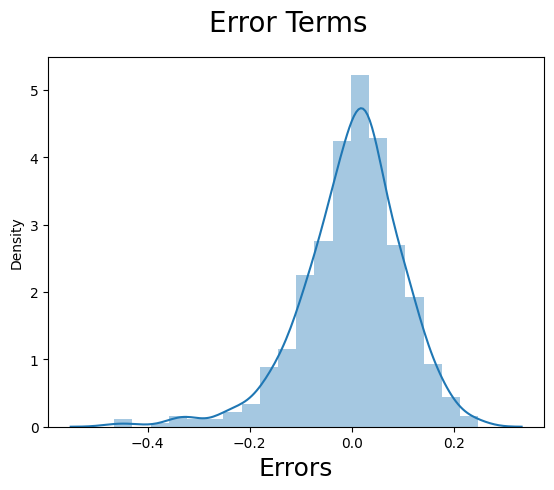

In [97]:
# Plot the histogram of error terms to check for normality
fig = plt.figure()
sns.distplot(err, bins=20)
fig.suptitle('Error Terms', fontsize=20)  # Set plot title
plt.xlabel('Errors', fontsize=18)  # Label x-axis


**Observation:**  
The error distribution follows a normal pattern, aligning with our regression assumptions. This confirms that residuals are randomly distributed, ensuring unbiased predictions. The model meets key assumptions, making it statistically reliable for forecasting bike demand accurately.

**Assumption - Homoscedasticity**

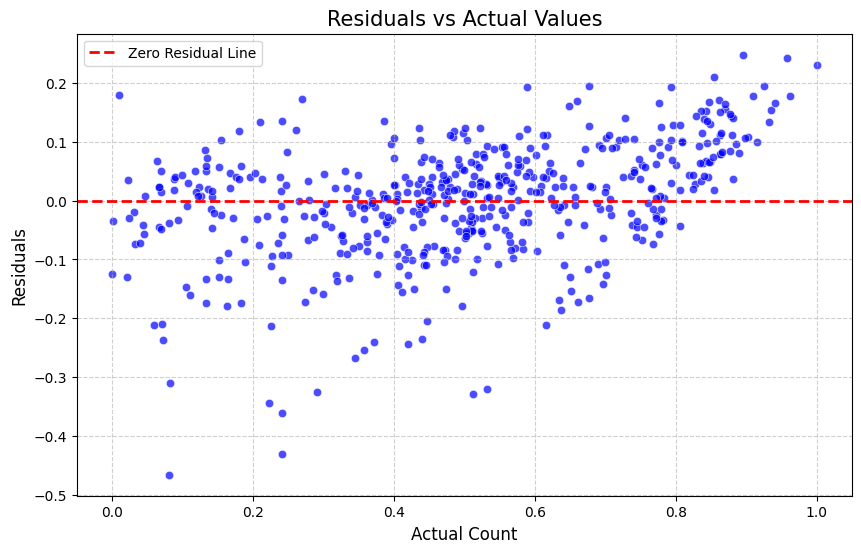

In [98]:
# Create a scatter plot of residuals vs actual values
plt.figure(figsize=(10, 6))  # Set figure size for better visualization
sns.scatterplot(x=y_train, y=err, color="blue", alpha=0.7)  # Residual scatter plot

# Add a horizontal line at y=0 to show the zero-residual line
plt.axhline( color='red', linestyle='--', linewidth=2, label='Zero Residual Line')


# Add labels and title
plt.xlabel('Actual Count', fontsize=12)  # Label for X-axis
plt.ylabel('Residuals', fontsize=12)  # Label for Y-axis
plt.title('Residuals vs Actual Values', fontsize=15)  # Title for the plot
plt.legend()  # Add legend for clarity
plt.grid(True, linestyle='--', alpha=0.6)  # Optional: Add grid for better visualization

# Show the plot
plt.show()


**Observation:**  
No visible pattern is observed in the residual vs. actual values plot, indicating no heteroscedasticity. This suggests that residuals have constant variance, which is a key assumption of linear regression. Meeting this assumption ensures the model's predictions remain stable and reliable across different levels of demand.

**Actual Vs Predicted Graph**

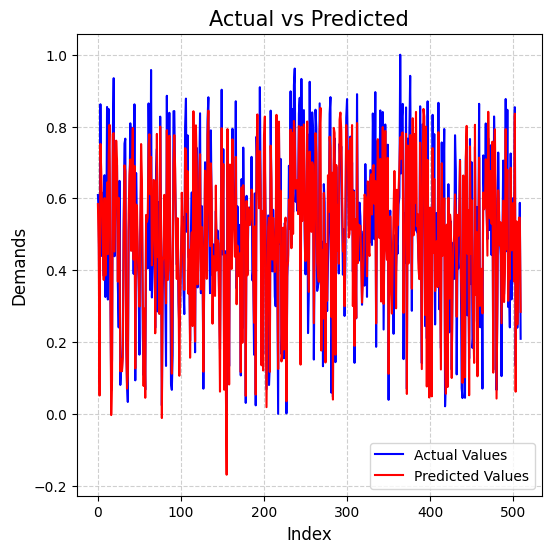

In [117]:
# Generate an index list for plotting
c = [i for i in range(len(X_train))]  # Simplified range generation

# Plotting the actual vs predicted values
plt.figure(figsize=(6, 6))  # Set figure size
plt.plot(c, y_train, color="blue", label="Actual Values")  # Actual values in blue
plt.plot(c, y_train_pred, color="red", label="Predicted Values")  # Predicted values in red

# Adding titles and labels
plt.title('Actual vs Predicted', fontsize=15)  # Title for the plot
plt.xlabel('Index', fontsize=12)  # X-axis label
plt.ylabel('Demands', fontsize=12)  # Y-axis label
plt.legend()  # Add legend for clarity
plt.grid(True, linestyle="--", alpha=0.6)  # Optional: Add grid for better visualization

# Show the plot
plt.show()


**Multi Colinearity**


In [100]:
calculate_vif(X_train_new)


,Features,VIF
2,windspeed,4.80
1,temp,4.28
0,year,2.08
3,season_spring,1.80
9,weathersit_Misty,1.55
4,season_winter,1.47
5,month_dec,1.23
7,month_sep,1.17
6,month_mar,1.16
8,weathersit_Light_snowrain,1.10


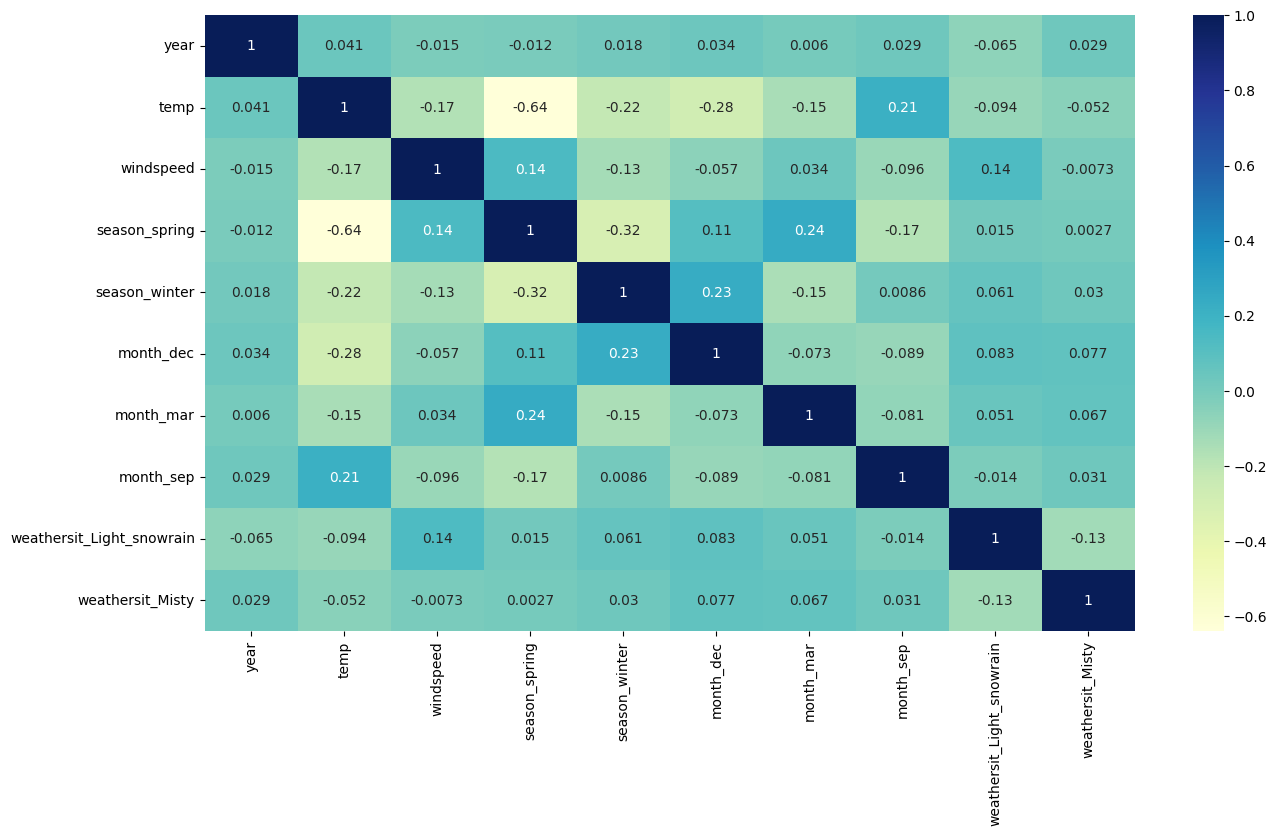

In [101]:
# Visualizing correlation between selected features in X_train_new
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="YlGnBu")
plt.show()


**Observation:**
VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap.

- Independence of residuals

    - Durbin-Watson value of final model lm_6th 2.099, which signifies there is no autocorrelation.

**Linearity**

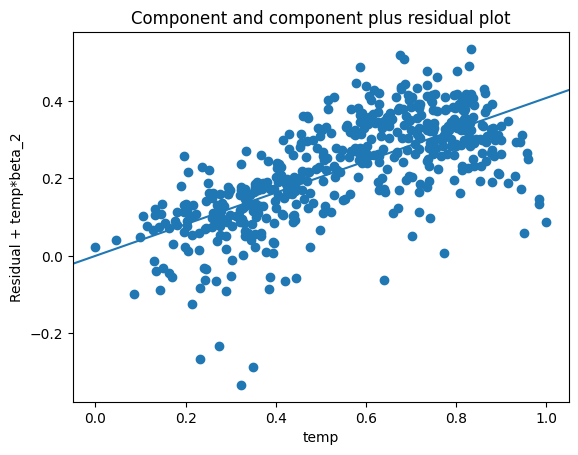

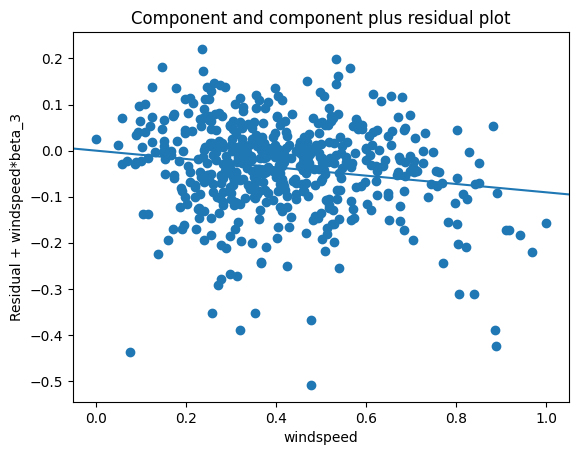

In [102]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lm_6th, 'temp')
plt.show()

sm.graphics.plot_ccpr(lm_6th, 'windspeed')
plt.show()


**Observation:**
Linearity can be observed from above visualizations.

### Step - 6: Model Predictions

**R2 Square Value for Train Data Prediction**

In [103]:
#Print R-squared Value
r2_score(y_train,y_train_pred)


0.8215746471778221

**Prediction Value on Test data**

In [104]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()


,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
468,1,0,0,0.543115,0.536771,0.518248,0.422104,0.848606,0,1,...,0,0,0,1,0,0,0,0,0,0
148,0,0,0,0.758058,0.704203,0.843709,0.479765,0.526017,0,1,...,0,0,0,0,1,0,0,0,0,0
302,0,0,0,0.324018,0.317998,0.642765,0.386287,0.350115,0,0,...,1,0,0,0,1,0,0,0,0,0
355,0,0,1,0.453814,0.455552,0.780592,0.062325,0.318363,1,0,...,0,0,0,0,0,1,0,0,0,1
515,1,0,1,0.773634,0.724915,0.507943,0.433030,0.833877,0,1,...,0,0,0,0,0,1,0,0,0,0


In [105]:
# Display summary statistics of the test dataset
df_test.describe()


,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.454545,0.031818,0.718182,0.526557,0.500943,0.629591,0.435018,0.480125,0.281818,0.236364,...,0.072727,0.063636,0.131818,0.127273,0.122727,0.136364,0.168182,0.140909,0.027273,0.318182
std,0.499065,0.175916,0.450911,0.229808,0.215606,0.152237,0.212390,0.232713,0.450911,0.425817,...,0.260281,0.244661,0.339064,0.334038,0.328872,0.343957,0.374881,0.348721,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.047675,0.051010,0.193646,0.060760,-0.049378,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.324018,0.314694,0.521081,0.281540,0.287849,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.505733,0.494075,0.609274,0.414837,0.472957,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.725609,0.684248,0.734893,0.533519,0.639291,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.970925,0.939531,1.002146,1.214955,0.980804,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [106]:
# Extract target variable 'cnt' from test dataset
y_test = df_test.pop('cnt')

# Define feature set for testing
X_test = df_test


In [107]:
# Select only the columns that were used in training to ensure consistency
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding a constant variable to X_test to match the regression model format
X_test_lm_5 = sm.add_constant(X_test)


In [108]:
# Predict y_test values using the trained regression model
y_pred = lm_6th.predict(X_test_lm_5)


In [109]:
# Calculate the R-squared value to evaluate model performance
r2 = r2_score(y_test, y_pred)
r2


0.8140755554184047

In [110]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(10,4))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)                               # Y-label


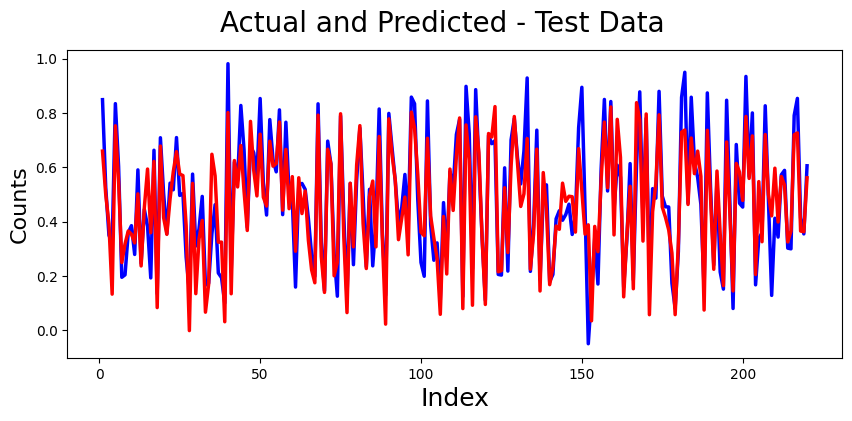

In [111]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_pred,len(y_test)+1,'Test Data')


### Step - 7: Model Evaluation

Text(0, 0.5, 'y_pred')

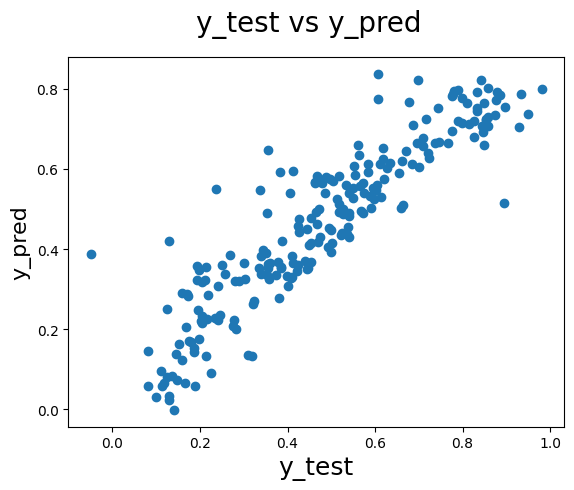

In [112]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 


In [113]:
round(lm_6th.params,4)


const                        0.2344
year                         0.2414
temp                         0.4082
windspeed                   -0.0906
season_spring               -0.1579
season_winter                0.0597
month_dec                   -0.0448
month_mar                    0.0633
month_sep                    0.0662
weathersit_Light_snowrain   -0.2650
weathersit_Misty            -0.0783
dtype: float64

In [114]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)


0.8052


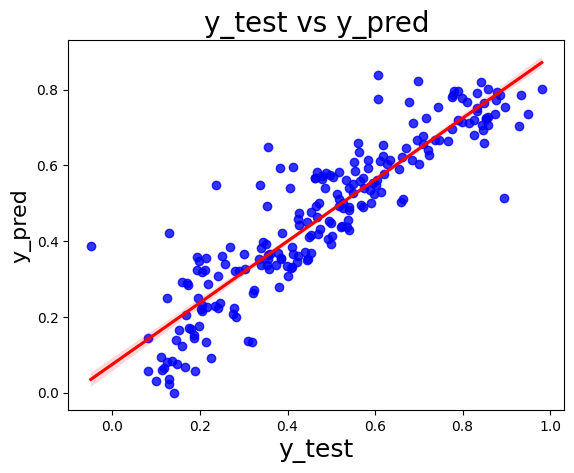

In [115]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()


**Comparision between Training and Testing dataset:**

- Train dataset R^2          : 0.822
- Test dataset R^2           : 0.814
- Train dataset Adjusted R^2 : 0.818
- Test dataset Adjusted R^2  : 0.8052 

- Demand of bikes depend on 
    - year
    - Dec, Sep, March Months
    - temp
    - windspeed 
    - Light_snowrain
    - Misty
    - spring and winter.